In [32]:
import pandas as pd
import pydicom
from pydicom import dcmread
from pydicom.fileset import FileSet
import os, datetime

def read_first_file(folder_path):
    """Reads the first file in the specified folder."""
    
    filename = os.listdir(folder_path)[0]
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        dataset = dcmread(file_path)
        
        # Extract TR, TE, FA, AT
        tr = dataset.RepetitionTime
        te = dataset.EchoTime
        fa = dataset.FlipAngle
        at = dataset.AcquisitionTime

    return [tr, te, fa, at]
    
hd = pd.read_csv('headerdb.csv', sep = "|")
df = pd.DataFrame(hd)

basepath = ''
final_df = pd.DataFrame()

for index, row in df.iterrows(): 
    
    pId = row['PatientID']
   
    studyDate = row['StudyDate']
    # Convert the string to a datetime object
    date_object = datetime.datetime.strptime(studyDate, "%Y-%m-%d")
    date = date_object.strftime('%Y%m%d')
       
    studyId = row['StudyInstanceUID']
    seriesId = row['SeriesInstanceUID']

    folder_path = os.path.join(basepath, str(pId), date, studyId, seriesId)
    tr, te, fa, at = read_first_file(folder_path)
    file_content = [tr, te, fa, at]
    para = pd.DataFrame(file_content).T 
    final_df = pd.concat([final_df, para], ignore_index=True)
    
final_df.columns=["TR", "TE", "FA", "AT"]
final_df.to_csv('output.csv', index=False)


In [66]:
hd = pd.read_csv('headerdb.csv', sep = "|")
hd = pd.DataFrame(hd)
#print(df.head())
imagetype = hd['ImageType']
new = pd.read_csv('output.csv')
new['ImageType'] = hd['ImageType']
#print(new)

new.loc[new['ImageType'] == 'T1'].to_csv('T1.csv', index=False)
new.loc[new['ImageType'] == 'T2'].to_csv('T2.csv', index=False)
new.loc[new['ImageType'] == 'TC'].to_csv('TC.csv', index=False)
new.loc[new['ImageType'] == 'FL'].to_csv('FL.csv', index=False)

#grouped = new.groupby('ImageType')
#[grouped.get_group('T1') for t1 in grouped.groups])


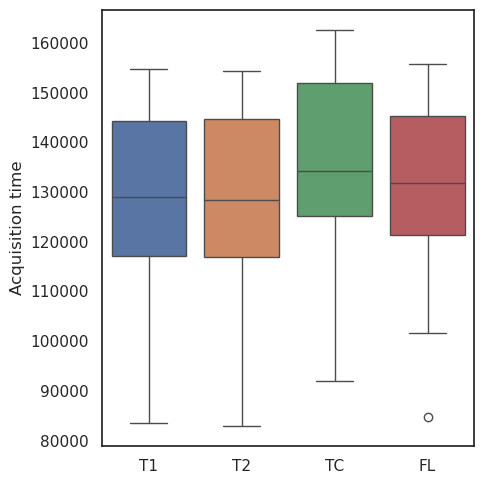

In [4]:
#False positive error
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


t1 = pd.read_csv( 'evan_cases/T1.csv')
t2 = pd.read_csv( 'evan_cases/T2.csv')
tc = pd.read_csv('evan_cases/TC.csv')
fl = pd.read_csv( 'evan_cases/FL.csv')

cat = pd.concat([t1['AT'], t2['AT'], tc['AT'], fl['AT']], axis=1)
cat.columns=["T1", "T2", "TC", "FL"]


sns.set(rc={'figure.figsize':(5,5)})
sns.set_theme(style='white')

ax = sns.boxplot(cat) #, palette="pastel")
ax.set(ylabel='Acquisition time')
#ax.tick_params(axis='x', labelrotation=45)
#ax.grid(visible=False,which='minor',color='b',linewidth=1.0)
#ax.set(ylim=(0.0, 1.0))

fig = ax.get_figure()
fig.tight_layout()
fig.savefig('AT.png', dpi=300)


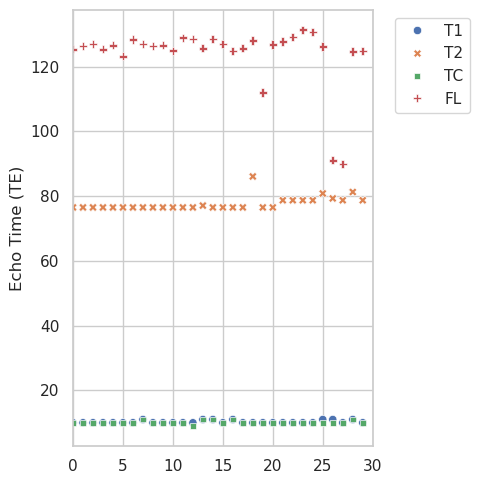

In [13]:
#Echo time
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


t1 = pd.read_csv( 'evan_cases/T1.csv')
t2 = pd.read_csv( 'evan_cases/T2.csv')
tc = pd.read_csv('evan_cases/TC.csv')
fl = pd.read_csv( 'evan_cases/FL.csv')

cat = pd.concat([t1['TE'],t2['TE'],tc['TE'], fl['TE']], axis=1)
cat.columns=["T1","T2","TC","FL"]


sns.set(rc={'figure.figsize':(5,5)})
sns.set_theme(style='whitegrid')

ax = sns.scatterplot(cat) #, palette="pastel")


ax.set(ylabel='Echo Time (TE)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#ax.tick_params(axis='x', labelrotation=45)
ax.set(xlim=(0.0, 30.0))

fig = ax.get_figure()
fig.tight_layout()
fig.savefig('TE.png', dpi=300)

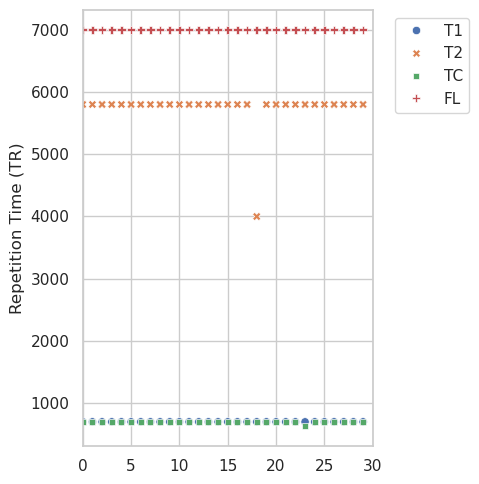

In [14]:
#Repetition time
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


t1 = pd.read_csv( 'evan_cases/T1.csv')
t2 = pd.read_csv( 'evan_cases/T2.csv')
tc = pd.read_csv('evan_cases/TC.csv')
fl = pd.read_csv( 'evan_cases/FL.csv')

cat = pd.concat([t1['TR'],t2['TR'],tc['TR'], fl['TR']], axis=1)
cat.columns=["T1","T2","TC","FL"]


sns.set(rc={'figure.figsize':(5,5)})
sns.set_theme(style='whitegrid')

ax = sns.scatterplot(cat) #, palette="pastel")


ax.set(ylabel='Repetition Time (TR)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#ax.tick_params(axis='x', labelrotation=45)
ax.set(xlim=(0.0, 30.0))

fig = ax.get_figure()
fig.tight_layout()
fig.savefig('TR.png', dpi=300)

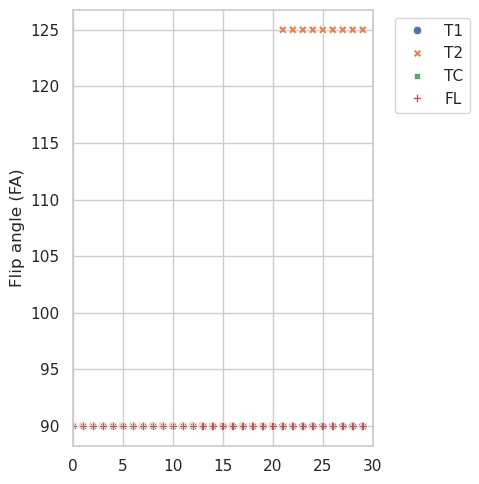

In [15]:
#Flip angle
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


t1 = pd.read_csv( 'evan_cases/T1.csv')
t2 = pd.read_csv( 'evan_cases/T2.csv')
tc = pd.read_csv('evan_cases/TC.csv')
fl = pd.read_csv( 'evan_cases/FL.csv')

cat = pd.concat([t1['FA'],t2['FA'],tc['FA'], fl['FA']], axis=1)
cat.columns=["T1","T2","TC","FL"]


sns.set(rc={'figure.figsize':(5,5)})
sns.set_theme(style='whitegrid')

ax = sns.scatterplot(cat) #, palette="pastel")


ax.set(ylabel='Flip angle (FA)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#ax.tick_params(axis='x', labelrotation=45)
ax.set(xlim=(0.0, 30.0))

fig = ax.get_figure()
fig.tight_layout()
fig.savefig('FA.png', dpi=300)

In [23]:
#Separate fl data from all cases
hd = pd.read_csv('evan_cases/all_cases.csv', sep = ",")
hd = pd.DataFrame(hd)
#print(df.head())
imagetype = hd['ImageType']

hd.loc[hd['ImageType'] == 'FL'].to_csv('fl_images.csv', index=False)

In [27]:
#Get the details of FL images
import pandas as pd
import pydicom
from pydicom import dcmread
from pydicom.fileset import FileSet
import os, datetime

def read_first_file(folder_path):
    """Reads the first file in the specified folder."""
    
    filename = os.listdir(folder_path)[0]
    file_path = os.path.join(folder_path, filename)
    if os.path.isfile(file_path):
        dataset = dcmread(file_path)
        
        # Extract TR, TE, FA, AT
        mrn = dataset.PatientID
        tr = dataset.RepetitionTime
        te = dataset.EchoTime
        fa = dataset.FlipAngle
        at = dataset.AcquisitionTime
        it = dataset.InversionTime

    return [mrn, tr, te, fa, at, it]
    
hd = pd.read_csv('fl_images.csv', sep = ",")
df = pd.DataFrame(hd)

basepath = '/rsrch1/ip/egates1/HistoricalRadPath/DICOM/'
final_df = pd.DataFrame()

for index, row in df.iterrows(): 
    
    pId = row['PatientID']
   
    studyDate = row['StudyDate']
    # Convert the string to a datetime object
    date_object = datetime.datetime.strptime(studyDate, "%Y-%m-%d")
    date = date_object.strftime('%Y%m%d')
       
    studyId = row['StudyInstanceUID']
    seriesId = row['SeriesInstanceUID']

    folder_path = os.path.join(basepath, str(pId), date, studyId, seriesId)
    mrn, tr, te, fa, at, it = read_first_file(folder_path)
    file_content = [mrn, tr, te, fa, at, it]
    para = pd.DataFrame(file_content).T 
    final_df = pd.concat([final_df, para], ignore_index=True)
    
final_df.columns=["MRN", "TR", "TE", "FA", "AT", "IT"]
final_df.to_csv('fl_dicom_tags.csv', index=False)


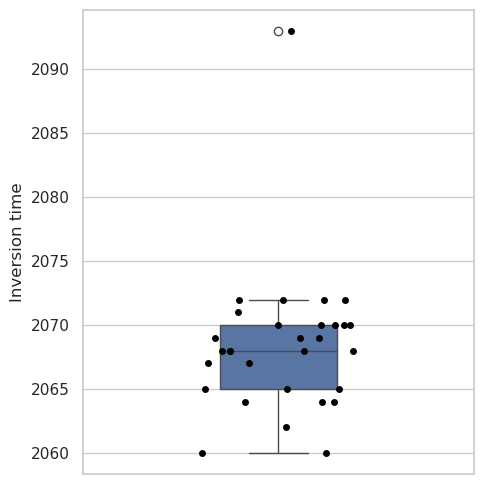

In [34]:
#Flip angle
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt



fl = pd.read_csv( 'fl_dicom_tags.csv')

#cat = pd.concat([t1['FA'],t2['FA'],tc['FA'], fl['IT']], axis=1)
#cat.columns=["T1","T2","TC","FL"]


sns.set(rc={'figure.figsize':(5,5)})
sns.set_theme(style='whitegrid')

ax = sns.boxplot(fl['IT'], width=0.3) #, palette="pastel")
ax = sns.stripplot(fl['IT'], color='black', jitter=0.2)

ax.set(ylabel='Inversion time')
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
#ax.tick_params(axis='x', labelrotation=45)
#ax.set(xlim=(0.0, 30.0))

fig = ax.get_figure()
fig.tight_layout()
fig.savefig('FL_IT.png', dpi=300)